## MODULE 10: Sentiment Analysis
### Members - Aishwarya, Dengyi

### **Introduction:**

The dataset consists of 1000 negative and 1000 positive reviews for films. The challenge is to analyse the sentiments and to train and predict the review category using Navie Bayes theorem

**Approach:**

1. Read all the files from Neg and Pos folders, Github repo(this was a challenging step for us)
2. Data preparation - This step includes removing punctuations from the documents using Regex. Also getting rid of the stop words, stemming and lemmatizing the words
3. Creating term-document matrix
4. Plotting the top 30 frequency distributions for Neg and Pos and plotting the word cloud
5. Splitting the data and training it using Naive Bayes classifier
6. Classification metrics
7. Testing the model on unseen document
8. Conclusion

In [25]:
#load libraries
import pandas as pd
import urllib.request
import regex as re
import requests
import numpy as np
import ssl
from bs4 import BeautifulSoup

In [26]:
#function to get the html of given url

def getHTMLdocument(url):    
    # request for HTML document of given url
    response = requests.get(url)      
    # response will be provided in JSON format
    return response.text

##### **Negative reviews:**

In [27]:
# URL on the Github where the csv files are stored
github_neg = 'https://github.com/Aishwarya-Deshmane/DAV-6150/tree/main/neg'
html_document_1 = getHTMLdocument(github_neg)

In [28]:
html_document_1

'\n\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-fe3f886b577a.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-a1dbeda2886c.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" media="all" rel="stylesheet" data-hre

In [29]:
#using beautifulsoup parse the html document
soup = BeautifulSoup(html_document_1, 'html.parser')

#using regex find the .txt files in it
txtfiles = soup.find_all(title=re.compile("\.txt$"))
filename_neg = []

#extract all the .txt filenames and append it into a list
for i in txtfiles:
    filename_neg.append(i.extract().get_text())

In [30]:
#extracted filenames
filename_neg[:5]

['cv000_29416.txt',
 'cv001_19502.txt',
 'cv002_17424.txt',
 'cv003_12683.txt',
 'cv004_12641.txt']

In [31]:
len(filename_neg)

1000

In [32]:
# This restores the same behavior as before
context = ssl._create_unverified_context()
data = []

#extract the data from all the files and append it into a list
path_1 = "https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-6150/main/neg/"
for i in filename_neg:
    data.append(urllib.request.urlopen(path_1+i, context=context))

In [33]:
data[:5]

In [34]:
len(data)

1000

In [35]:
#from the http responce, read the content line by line and append it in reviews and also append the neg/pos category
reviews = []
category = []
for l in data:
    line = l.readlines()
    reviews.append(line)
    category.append(0)

In [36]:
reviews[:2]

[[b'plot : two teen couples go to a church party , drink and then drive . \n',
  b'they get into an accident . \n',
  b'one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \n',
  b"what's the deal ? \n",
  b'watch the movie and " sorta " find out . . . \n',
  b'critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \n',
  b"which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . \n",
  b'they seem to have taken this pretty neat concept , but executed it terribly . \n',
  b'so what are the problems with the movie ? \n',
  b"well , its main problem is that it's simply too jumbled . \n",
  b'it starts off " normal " but then down

#### **Positive reviews:**

In [37]:
#repeat the above steps for pos folder and append the content to the same lists

github_pos = 'https://github.com/Aishwarya-Deshmane/DAV-6150/tree/main/pos'
html_document_2 = getHTMLdocument(github_pos)
soup = BeautifulSoup(html_document_2, 'html.parser')
txtfiles = soup.find_all(title=re.compile("\.txt$"))
filename_pos = []
for i in txtfiles:
    filename_pos.append(i.extract().get_text())

# This restores the same behavior as before
context = ssl._create_unverified_context()
data1 = []
path_2 = "https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-6150/main/pos/"
for j in filename_pos:
    data1.append(urllib.request.urlopen(path_2+j, context=context))

for l in data1:
    line1 = l.readlines()
    reviews.append(line1)
    category.append(1)

In [38]:
html_document_2[:5]

'\n\n\n\n\n'

In [39]:
data1

In [40]:
#create a dataframe with reviews and category
df = pd.DataFrame()
df['Reviews']=reviews
df['Category']=category
df.head()

,Reviews,Category
0,[b'plot : two teen couples go to a church part...,0
1,"[b""the happy bastard's quick movie review \n"",...",0
2,[b'it is movies like these that make a jaded m...,0
3,"[b' "" quest for camelot "" is warner bros . \' ...",0
4,"[b""synopsis : a mentally unstable man undergoi...",0


In [41]:
df.tail()

,Reviews,Category
1995,"[b'wow ! what a movie . \n', b""it's everything...",1
1996,"[b""richard gere can be a commanding actor , bu...",1
1997,"[b'glory--starring matthew broderick , denzel ...",1
1998,"[b""steven spielberg's second epic film on worl...",1
1999,"[b'truman ( "" true-man "" ) burbank is the perf...",1


In [42]:
#check the shape of the df, it should be 2000
df.shape

(2000, 2)

In [43]:
#randomly check the reviews
df['Reviews'][999]

[b'two party guys bob their heads to haddaway\'s dance hit " what is love ? " \n',
 b'while getting themselves into trouble in nightclub after nightclub . \n',
 b'it\'s barely enough to sustain a three-minute _saturday_night_live_ skit , but _snl_ producer lorne michaels , _clueless_ creator amy heckerling , and paramount pictures saw something in the late night television institution\'s recurring " roxbury guys " sketch that would presumably make a good feature . \n',
 b'emphasis on the word " presumably . " \n',
 b"_a_night_at_the_roxbury_ takes an already-thin concept and tediously stretches it far beyond the breaking point--and that of viewers' patience levels . \n",
 b'the first five minutes or so of _roxbury_ play very much like one of the original " roxbury guys " skits . \n',
 b'with " what is love ? " \n',
 b'blaring on the soundtrack , the brotherly duo of doug and steve butabi ( chris kattan and will ferrell ) bob their heads , scope out " hotties " at clubs , and then bump 

### **Data Preparation:**

In [44]:
#clean the data and remove the unwanted stuff

i = 0
reviews_cleaned = []
for i in df['Reviews']:
  #convert the type into string and lower case
  l = str(i).lower()

  #remove the b' and b" from each line
  l = re.sub("b'",'',l)
  l = re.sub('b"','',l)
  #l = re.sub("\\s\\n",'',l)

  #remove the new line syntax (\n) from each line
  l = re.sub(r'\\n','',l)
  #l = l.strip().replace('\n','')

  #remove everything except alphabets and spaces. This will remove the punctuations
  l = re.sub(r'[^\w\s]+','',l)

  #substitute the underscore with space 
  l = re.sub('[_]+',' ',l)

  #substitue 1 or more spaces with single space. Append the result into a new list
  reviews_cleaned.append(re.sub(r'\s+',' ',l))

In [45]:
#check the type
type(df['Reviews'][0])

list

In [46]:
#check the cleaned version of any document
reviews_cleaned[999]

'two party guys bob their heads to haddaways dance hit what is love while getting themselves into trouble in nightclub after nightclub its barely enough to sustain a threeminute saturday night live skit but snl producer lorne michaels clueless creator amy heckerling and paramount pictures saw something in the late night television institutions recurring roxbury guys sketch that would presumably make a good feature emphasis on the word presumably a night at the roxbury takes an alreadythin concept and tediously stretches it far beyond the breaking pointand that of viewers patience levels the first five minutes or so of roxbury play very much like one of the original roxbury guys skits with what is love blaring on the soundtrack the brotherly duo of doug and steve butabi chris kattan and will ferrell bob their heads scope out hotties at clubs and then bump a select few with violent pelvic thrusts there is one crucial difference howeverthese guys speak that little fact has been used as ju

In [47]:
#split the data into tokens
tkn = []
for i in reviews_cleaned:
  tkn.append(i.split())

In [48]:
print(tkn[:2])

[['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink', 'and', 'then', 'drive', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', 'and', 'has', 'nightmares', 'whats', 'the', 'deal', 'watch', 'the', 'movie', 'and', 'sorta', 'find', 'out', 'critique', 'a', 'mindfuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', 'mess', 'with', 'your', 'head', 'and', 'such', 'lost', 'highway', 'memento', 'but', 'there', 'are', 'good', 'and', 'bad', 'ways', 'of', 'making', 'all', 'types', 'of', 'films', 'and', 'these', 'folks', 'just', 'didnt', 'snag', 'this', 'one', 'co

In [49]:
len(tkn)

2000

In [50]:
#import stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
#print stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [52]:
#remove the stop words from the tokens created. Also stem the words which are not in stop words
tkns =[]
reviews_cleaned_1 =[]
for t in tkn:
  k = []
  for tn in t:
    if tn not in stop_words:
      k.append(ps.stem(tn))
  reviews_cleaned_1.append(" ".join(k))
  tkns.append(k)

In [53]:
reviews_cleaned_1[1]

'happi bastard quick movi review damn y2k bug got head start movi star jami lee curti anoth baldwin brother william time stori regard crew tugboat come across desert russian tech ship strang kick power back littl know power within go gore bring action sequenc viru still feel empti like movi go flash substanc dont know crew realli middl nowher dont know origin took ship big pink flashi thing hit mir cours dont know donald sutherland stumbl around drunkenli throughout hey let chase peopl around robot act averag even like curti your like get kick work halloween h20 sutherland wast baldwin well he act like baldwin cours real star stan winston robot design schnazzi cgi occasion good gore shot like pick someon brain robot bodi part realli turn here movi otherwis pretti much sunken ship movi'

In [54]:
print(tkns[:2])

[['plot', 'two', 'teen', 'coupl', 'go', 'church', 'parti', 'drink', 'drive', 'get', 'accid', 'one', 'guy', 'die', 'girlfriend', 'continu', 'see', 'life', 'nightmar', 'what', 'deal', 'watch', 'movi', 'sorta', 'find', 'critiqu', 'mindfuck', 'movi', 'teen', 'gener', 'touch', 'cool', 'idea', 'present', 'bad', 'packag', 'make', 'review', 'even', 'harder', 'one', 'write', 'sinc', 'gener', 'applaud', 'film', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'way', 'make', 'type', 'film', 'folk', 'didnt', 'snag', 'one', 'correctli', 'seem', 'taken', 'pretti', 'neat', 'concept', 'execut', 'terribl', 'problem', 'movi', 'well', 'main', 'problem', 'simpli', 'jumbl', 'start', 'normal', 'downshift', 'fantasi', 'world', 'audienc', 'member', 'idea', 'what', 'go', 'dream', 'charact', 'come', 'back', 'dead', 'other', 'look', 'like', 'dead', 'strang', 'apparit', 'disappear', 'looooot', 'chase', 'scene', 'ton', 'weird', 'thing', 'happen', 'simpli', 'explain', 'person

In [55]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wnl=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
#Lemmatize the words to get proper meaning of the words after stemming
tkns_2 =[]
reviews_cleaned_2 =[]
for t in tkns:
  k = []
  for tn in t:
    if tn not in stop_words:
      k.append(wnl.lemmatize(tn.lower()))
  reviews_cleaned_2.append(" ".join(k))
  tkns_2.append(k)

In [57]:
reviews_cleaned_2[1]

'happi bastard quick movi review damn y2k bug got head start movi star jami lee curti anoth baldwin brother william time stori regard crew tugboat come across desert russian tech ship strang kick power back littl know power within go gore bring action sequenc viru still feel empti like movi go flash substanc dont know crew realli middl nowher dont know origin took ship big pink flashi thing hit mir cours dont know donald sutherland stumbl around drunkenli throughout hey let chase peopl around robot act averag even like curti like get kick work halloween h20 sutherland wast baldwin well act like baldwin cours real star stan winston robot design schnazzi cgi occasion good gore shot like pick someon brain robot bodi part realli turn movi otherwis pretti much sunken ship movi'

In [58]:
print(tkns_2[:2])

[['plot', 'two', 'teen', 'coupl', 'go', 'church', 'parti', 'drink', 'drive', 'get', 'accid', 'one', 'guy', 'die', 'girlfriend', 'continu', 'see', 'life', 'nightmar', 'deal', 'watch', 'movi', 'sorta', 'find', 'critiqu', 'mindfuck', 'movi', 'teen', 'gener', 'touch', 'cool', 'idea', 'present', 'bad', 'packag', 'make', 'review', 'even', 'harder', 'one', 'write', 'sinc', 'gener', 'applaud', 'film', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'way', 'make', 'type', 'film', 'folk', 'didnt', 'snag', 'one', 'correctli', 'seem', 'taken', 'pretti', 'neat', 'concept', 'execut', 'terribl', 'problem', 'movi', 'well', 'main', 'problem', 'simpli', 'jumbl', 'start', 'normal', 'downshift', 'fantasi', 'world', 'audienc', 'member', 'idea', 'go', 'dream', 'charact', 'come', 'back', 'dead', 'look', 'like', 'dead', 'strang', 'apparit', 'disappear', 'looooot', 'chase', 'scene', 'ton', 'weird', 'thing', 'happen', 'simpli', 'explain', 'person', 'dont', 'mind', 'tri',

In [59]:
#add the cleaned reviews column to the df
df['reviews_cleaned']=reviews_cleaned_2

In [60]:
#add the tokens columns to the df
df['tkns'] = tkns_2

In [61]:
df.index

RangeIndex(start=0, stop=2000, step=1)

In [62]:
df[:5]

,Reviews,Category,reviews_cleaned,tkns
0,[b'plot : two teen couples go to a church part...,0,plot two teen coupl go church parti drink driv...,"[plot, two, teen, coupl, go, church, parti, dr..."
1,"[b""the happy bastard's quick movie review \n"",...",0,happi bastard quick movi review damn y2k bug g...,"[happi, bastard, quick, movi, review, damn, y2..."
2,[b'it is movies like these that make a jaded m...,0,movi like make jade movi viewer thank invent t...,"[movi, like, make, jade, movi, viewer, thank, ..."
3,"[b' "" quest for camelot "" is warner bros . \' ...",0,quest camelot warner bro first featurelength f...,"[quest, camelot, warner, bro, first, featurele..."
4,"[b""synopsis : a mentally unstable man undergoi...",0,synopsi mental unstabl man undergo psychothera...,"[synopsi, mental, unstabl, man, undergo, psych..."


### **Term-document matrix:**

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

# initialize
cv = CountVectorizer(stop_words='english') 

In [64]:
#using countvectorizer create document term matrix using same index

from sklearn.feature_extraction.text import CountVectorizer

# initialize
cv = CountVectorizer(stop_words='english') 
cv_matrix = cv.fit_transform(df['reviews_cleaned'])
# create document term matrix
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df.index, columns=cv.get_feature_names_out())

In [65]:
df_dtm

,00,000,0009f,000acr,000aweek,000foot,000paltri,007,007esqu,010,...,zuehlk,zuko,zukovski,zulu,zundel,zurg,zweibel,zwick,zwigoff,zyci
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#add category to the term document matrix df
df_dtm['pos_or_neg']=category

In [67]:
df_dtm.columns

Index(['00', '000', '0009f', '000acr', '000aweek', '000foot', '000paltri',
       '007', '007esqu', '010',
       ...
       'zuko', 'zukovski', 'zulu', 'zundel', 'zurg', 'zweibel', 'zwick',
       'zwigoff', 'zyci', 'pos_or_neg'],
      dtype='object', length=31615)

### **Term document frequency:**

In [68]:
#term documents for neg reviews 
df_dtm[:1000].sum(axis=0).sort_values()

pos_or_neg        0
doubleprong       0
doublesid         0
largerthem        0
doubleteam        0
               ... 
make           1502
charact        1802
like           2050
movi           3732
film           4963
Length: 31615, dtype: int64

In [69]:
#term documents for pos reviews 
df_dtm[1000:].sum(axis=0).sort_values()

leachman                  0
testosteroneoverdos       0
teteatet                  0
poorlymotiv               0
fluent                    0
                       ... 
make                   1650
like                   1948
charact                2053
movi                   3126
film                   6144
Length: 31615, dtype: int64

In [70]:
#check if terms in the documents
if df_dtm.columns.isin (['movies','movie','film','films','movi']).any():
  print ("Please drop these columns")

Please drop these columns


In [71]:
#drop these terms/features
df_dtm = df_dtm.drop(columns=['movie','film','movi'],axis=1)

#### **Top 30 terms from Negative reviews:** 

In [72]:
#term documents for neg reviews except for category feature 
df_dtm.loc[0:1000,df_dtm.columns!='pos_or_neg'].sum(axis=0).sort_values()

zyci                   0
immaculatelywhit       0
immeasur               0
ubertemptress          0
immediaci              0
                    ... 
scene               1289
time                1379
make                1504
charact             1802
like                2054
Length: 31611, dtype: int64

In [73]:
#top 30 term documents for neg reviews except for category feature 
top_30_neg = df_dtm.loc[0:1000,df_dtm.columns!='pos_or_neg'].sum(axis=0).sort_values(ascending=False)[0:30]
top_30_neg

like        2054
charact     1802
make        1504
time        1379
scene       1289
good        1156
play        1134
bad         1028
look        1019
stori        973
plot         933
end          876
thing        851
come         841
way          831
realli       789
know         787
work         785
tri          751
littl        723
year         681
dont         677
doesnt       670
peopl        666
action       649
director     644
think        632
want         631
say          625
actor        619
dtype: int64

In [74]:
#load matplotlib
import matplotlib.pyplot as plt

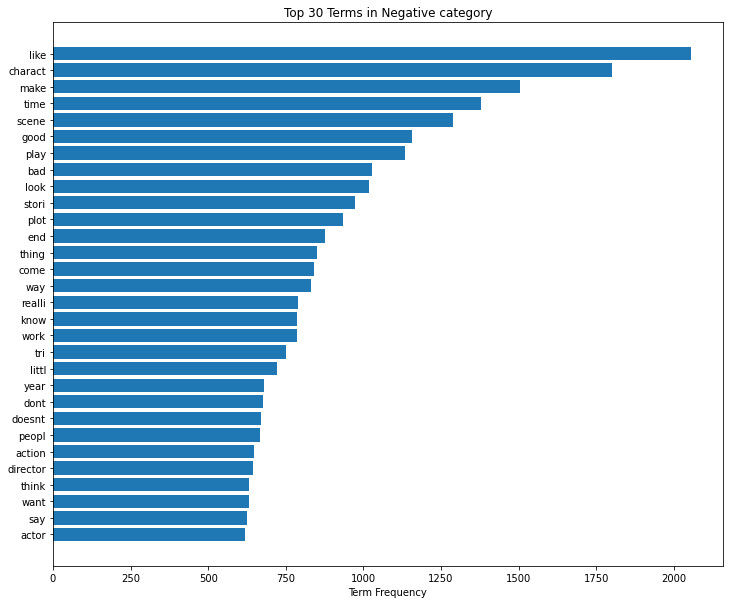

In [75]:
#plot top 30 terms in negative category documents
fig = plt.figure(figsize = (12, 10))
plt.barh(top_30_neg.index,top_30_neg)
plt.gca().invert_yaxis()
plt.xlabel("Term Frequency")
#plt.ylabel("Terms")
plt.title("Top 30 Terms in Negative category")
plt.show()

#### **Top 30 terms from Positive reviews:**

In [76]:
#term documents for pos reviews except for category feature 
df_dtm[1000:].sum(axis=0).sort_values()

dachshund       0
niknak          0
nike            0
dov             0
transluc        0
             ... 
scene        1350
time         1525
make         1650
like         1948
charact      2053
Length: 31612, dtype: int64

In [77]:
#top 30 term documents for neg reviews except for category feature
top_30_pos = df_dtm.loc[1000:,df_dtm.columns!='pos_or_neg'].sum(axis=0).sort_values(ascending=False)[0:30]
top_30_pos

charact    2053
like       1948
make       1650
time       1525
scene      1350
stori      1347
good       1229
play       1227
way        1024
life        994
end         952
perform     941
come        927
work        912
year        881
love        848
best        810
look        809
thing       803
peopl       795
mani        780
realli      776
littl       773
great       771
know        764
man         740
new         718
star        685
world       662
becom       640
dtype: int64

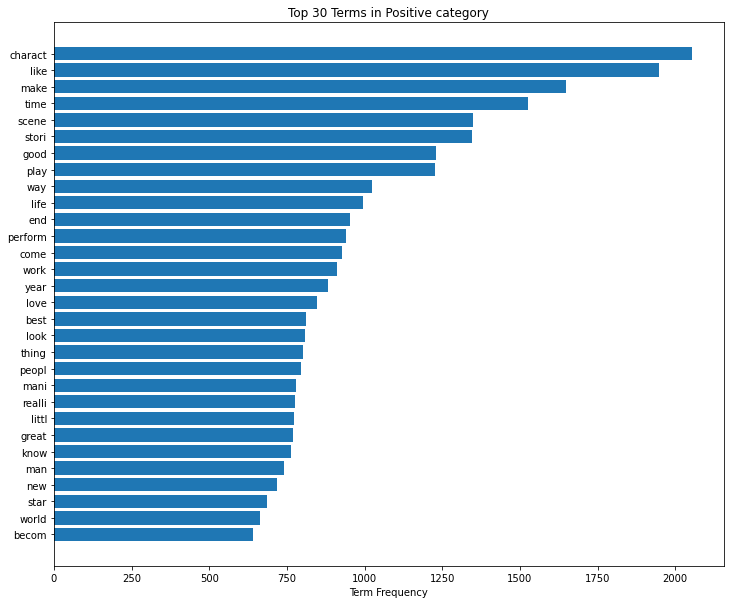

In [78]:
#plot top 30 terms in positive category documents
fig = plt.figure(figsize = (12, 10))
plt.barh(top_30_pos.index,top_30_pos)
plt.gca().invert_yaxis()
plt.xlabel("Term Frequency")
#plt.ylabel("Terms")
plt.title("Top 30 Terms in Positive category")
plt.show()

### **word-cloud**

In [79]:
#word cloud
from wordcloud import WordCloud

**Word cloud for Top 30 terms in Negative reviews:**

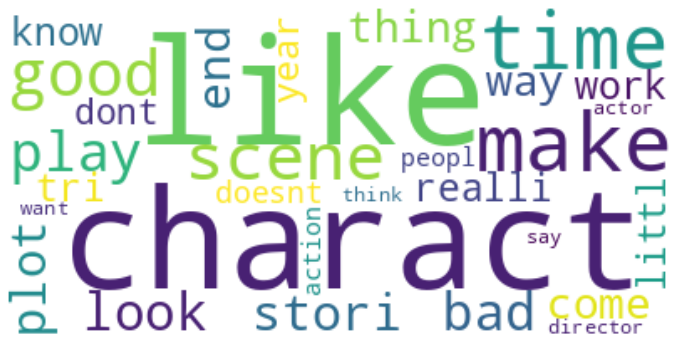

In [80]:
#create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(top_30_neg)

#plot
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


from sklearn.feature_extraction.text import CountVectorizer

# initialize
cv = CountVectorizer(stop_words='english') **Word cloud for Top 30 terms in Postive reviews:**

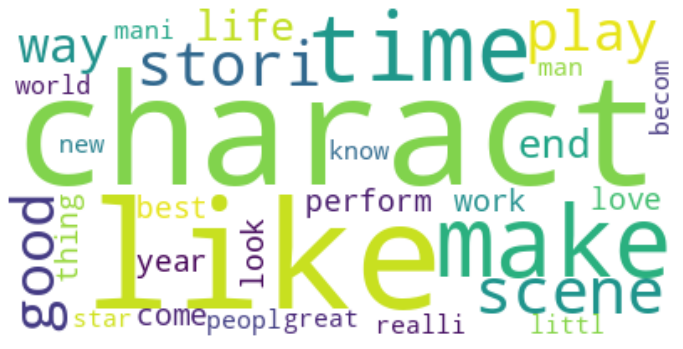

In [81]:
#create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(top_30_pos)

#plot
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Data Model:**

In [82]:
# turn the class column to the last one for easier to see
df_id = df_dtm['pos_or_neg']
result = df_dtm.drop('pos_or_neg',axis=1)
result.insert(31611,'pos_or_neg',df_id)  

In [83]:
result

,00,000,0009f,000acr,000aweek,000foot,000paltri,007,007esqu,010,...,zuko,zukovski,zulu,zundel,zurg,zweibel,zwick,zwigoff,zyci,pos_or_neg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [84]:
X=result.drop(columns=['pos_or_neg'])
Y=result['pos_or_neg']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.25,random_state = 12)

In [87]:
from sklearn.naive_bayes import MultinomialNB

In [88]:
clf = MultinomialNB()

In [89]:
clf.fit(X_train, Y_train)

MultinomialNB()

In [90]:
clf.score(X_train,Y_train)

0.9746666666666667

In [91]:
clf.score(X_valid,Y_valid)

0.782

# We consider this is because of overfitting.

In [92]:
predicted = clf.predict(X_valid)
predicted

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [93]:
probs = clf.predict_proba(X_valid)
probs

array([[1.00000000e+00, 3.82987093e-35],
       [2.79507060e-05, 9.99972049e-01],
       [9.99999795e-01, 2.05233475e-07],
       [1.00000000e+00, 1.97231179e-14],
       [1.89928009e-19, 1.00000000e+00],
       [7.71517894e-01, 2.28482106e-01],
       [1.00000000e+00, 1.95047867e-19],
       [1.30825632e-22, 1.00000000e+00],
       [1.66946170e-04, 9.99833054e-01],
       [1.00000000e+00, 9.08438008e-19],
       [9.73666795e-01, 2.63332053e-02],
       [5.69680200e-29, 1.00000000e+00],
       [9.95223822e-01, 4.77617792e-03],
       [1.88112939e-07, 9.99999812e-01],
       [3.74266164e-06, 9.99996257e-01],
       [1.00000000e+00, 2.13824114e-11],
       [1.00000000e+00, 1.49370825e-18],
       [3.16499451e-15, 1.00000000e+00],
       [1.00000000e+00, 5.84953388e-18],
       [8.71481876e-01, 1.28518124e-01],
       [9.99999999e-01, 6.93247396e-10],
       [1.00000000e+00, 2.97535532e-25],
       [1.86077565e-17, 1.00000000e+00],
       [9.99992377e-01, 7.62288031e-06],
       [2.597861

#Extract most informative 30 features

In [94]:
list_coef=clf.feature_log_prob_[0]

In [95]:
column_clf=X_train.columns.to_list()

In [96]:
data_ex=pd.DataFrame(
    {'feature': column_clf,
        'coef': list_coef,
     
     
    })

In [97]:
data_ex

,feature,coef
0,00,-10.468773
1,000,-8.725804
2,0009f,-12.414683
3,000acr,-11.721536
4,000aweek,-12.414683
...,...,...
31606,zurg,-12.414683
31607,zweibel,-12.414683
31608,zwick,-10.805245
31609,zwigoff,-12.414683


In [98]:
data_ex.sort_values(by="coef" , ascending=False).head(30)

,feature,coef
15942,like,-5.075145
4803,charact,-5.227782
16645,make,-5.399869
28152,time,-5.479313
24050,scene,-5.498960
11437,good,-5.626838
21084,play,-5.674164
2312,bad,-5.745185
16219,look,-5.816174
26654,stori,-5.841003


In [99]:
from sklearn import metrics 
print(metrics.accuracy_score(Y_valid, predicted))
print(metrics.roc_auc_score(Y_valid, probs[:, 1]))
print(metrics.confusion_matrix(Y_valid, predicted))
print(metrics.classification_report(Y_valid, predicted))

0.782
0.8528992699795082
[[205  51]
 [ 58 186]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       256
           1       0.78      0.76      0.77       244

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.78      0.78      0.78       500



### **Applying classifier to unseen data(Task 10):**

In [127]:
text = '''There were some things I didn't like about this film. Here's what I remember most strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the bear from Hercules in New York); an extra with a less than believable laugh; an ex-drug addict martian with tics; child actors who recite their lines very slowly and carefully; a newspaper headline declaring that Santa has been kidnapped, and a giant robot. The least appealing acting job in the film must be when Mother Claus and her elves have been frozen by the Martians weapons. They seemed to display an exaggerated amount of fear. Perhaps this was the preferred acting style in the 1960's??\n'''

In [101]:
text1 = []
text1.append(text)

In [102]:
text1

["There were some things I didn't like about this film. Here's what I remember most strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the bear from Hercules in New York); an extra with a less than believable laugh; an ex-drug addict martian with tics; child actors who recite their lines very slowly and carefully; a newspaper headline declaring that Santa has been kidnapped, and a giant robot. The least appealing acting job in the film must be when Mother Claus and her elves have been frozen by the Martians weapons. They seemed to display an exaggerated amount of fear. Perhaps this was the preferred acting style in the 1960's??\\n"]

In [106]:
data_test2.index = data_test2.index+2000
result3 = result.append(data_test2, sort=False)
result3 = result3.fillna(0)

<ipython-input-106-22cd834ad4d5>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result3 = result.append(data_test2, sort=False)


In [117]:
X1=cv.fit_transform(text1)

In [ ]:
data3=pd.DataFrame(X3.toarray(),columns=vec.get_feature_names())
data_test=data3
data_test

In [138]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

In [139]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [148]:
lemmatizer = WordNetLemmatizer()

In [145]:
def clean_text(text):
    # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    #lower case
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and punctuation
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens back into text
    text = ' '.join(tokens)
    return text

In [146]:
def article_prediction(model,article):
    X = df_dtm.drop(['pos_or_neg'],axis=1)
    y = df_dtm['pos_or_neg']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(X_train)

    processed_article = clean_text(article)

    X_article = vectorizer.transform([processed_article])


    result = model.predict(X_article)

    if result[0] == 1:
        print("Positive review")
    else:
        print("Negative review")

In [149]:
article_prediction(clf,text)

Negative review


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


# Conclusion:
1. We get overfitting because the score of training dataset is about 97% but the score for the valid dataset is just 78%.
2. Aishwarya using her excellent knowledge successfully scrape the data from GitHub.
3. We find that naive bayes is a good model for nlp, but we need to do more to prevent overfitting.
4. We are lacking of some words in the sentence we need to predict, and get the error.

#Cite: To prevent OOV, I use what Xin Xiang said in class.